In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import datasets
import mglearn
from IPython.display import display

In [70]:
digits = load_digits()

In [71]:
x = digits.data
y = digits.target

In [72]:
x.shape

(1797, 64)

In [73]:
y.shape

(1797,)

In [74]:
x[2].reshape(8,8)

array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 15.,  1.,  0.,  0.],
       [ 0.,  9., 16., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 13., 16., 16., 11.,  5.,  0.],
       [ 0.,  0.,  0.,  3., 11., 16.,  9.,  0.]])

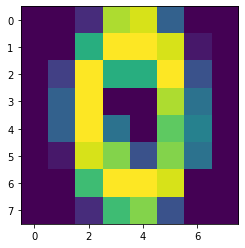

In [75]:
plt.imshow(x[55].reshape(8,8))

In [76]:
y[55]

0

In [77]:
pd.Series(y).value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

In [78]:
 y = y == 9

In [79]:
pd.Series(y).value_counts()/len(y)  # imbalanced dataset

False    0.899833
True     0.100167
dtype: float64

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=111)

In [81]:
from sklearn.dummy import DummyClassifier

# 다수의 클래스로 예측하는 classifier생성 - 위의 데이터에 대해 100% False로만 예측
dummy_majority = DummyClassifier(strategy='most_frequent').fit(x_train, y_train)

In [82]:
preds = dummy_majority.predict(x_test)
preds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [83]:
np.mean(y_test == preds)

0.8955555555555555

In [84]:
dummy_majority.score(x_test, y_test)

# 전혀 분류능력이 없는 classifier가 90%의 accuracy score를 기록.. <= imbalanced data
# => accuracy의 한계.. => precision, recall, f1_score, auc_score....

0.8955555555555555

In [85]:
# accuracy

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()

tree.fit(x_train, y_train)
knn.fit(x_train, y_train)
svc.fit(x_train, y_train)

tree_acc = tree.score(x_test, y_test)
knn_acc = knn.score(x_test, y_test)
svc_acc = svc.score(x_test, y_test)
dummy_acc = dummy_majority.score(x_test, y_test)

print('Tree :', round(tree_acc,2), 'Knn :', round(knn_acc,2), \
      'SVC :', round(svc_acc,2), 'dummy :', round(dummy_acc,2))

Tree : 0.96 Knn : 1.0 SVC : 1.0 dummy : 0.9


In [86]:
from sklearn.metrics import f1_score

In [87]:
# f1_score

tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()

tree.fit(x_train, y_train)
knn.fit(x_train, y_train)
svc.fit(x_train, y_train)

tree_preds = tree.predict(x_test)
knn_preds = knn.predict(x_test)
svc_preds = svc.predict(x_test)
dummy_preds = dummy_majority.predict(x_test)

tree_f1 = f1_score(tree_preds, y_test)
knn_f1 = f1_score(knn_preds, y_test)
svc_f1 = f1_score(svc_preds, y_test)
dummy_f1 = f1_score(dummy_preds, y_test)

print('Tree :', round(tree_f1,2), 'Knn :', round(knn_f1,2), \
      'SVC :', round(svc_f1,2), 'dummy :', round(dummy_f1,2))

Tree : 0.8 Knn : 0.99 SVC : 0.99 dummy : 0.0


In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
cm = confusion_matrix(tree_preds, y_test)
cm

array([[393,   9],
       [ 10,  38]], dtype=int64)

In [101]:
# accuracy = (cm[0,0] + cm[1,1]) / cm.sum()

# # 0 class
# precision = cm[0,0]/cm[:,0].sum()
# recall = cm[0,0]/cm[0,:].sum()

In [89]:
print(classification_report(tree_preds, y_test))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98       402
        True       0.81      0.79      0.80        48

    accuracy                           0.96       450
   macro avg       0.89      0.88      0.89       450
weighted avg       0.96      0.96      0.96       450



In [ ]:
# 모든 머신러닝 모델은 내부적으로 확률값을 리턴..

In [56]:
from mglearn.datasets import make_blobs

x, y = make_blobs(n_samples=(400,5), centers=2, cluster_std=[7, 2], random_state=11)
print(x[:10],y[:10])

[[ -1.58341978 -22.37156225]
 [ -4.17570775  -5.96493849]
 [-13.82618705 -14.40188785]
 [  0.71057905  -3.81896754]
 [-16.18799493 -17.86041252]
 [ -5.04648232 -13.08413534]
 [ -2.38421045   4.24907617]
 [ -7.62667962  -7.02174225]
 [ -4.33194738 -16.93515838]
 [-10.46971421  -3.7552367 ]] [0 0 0 0 0 0 0 0 0 0]


In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=111)

In [59]:
svc = SVC(gamma=0.5, probability=True)
svc.fit(x_train, y_train)
preds= svc.predict(x_test)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# sklearn에서 모델이 예측확률값을 리턴하는 함수..
# 1. decision_function() - 0을 기준으로. svc
# 2. predict_proba() - 0.5를 기준으로, 높은 확률값의 클래스. svc

In [61]:
svc.decision_function(x_test)  # 0보다 크면 1, 0보다 작으며 0으로 예측..

array([-1.00042127, -0.98834083, -1.00017991, -1.00268102, -1.00259514,
       -1.0097318 , -0.98095167, -0.99972821, -1.00114562, -0.99806483,
       -0.99550865, -0.99961719, -0.99849675, -0.98472113, -0.99423151,
       -0.99603354, -0.99907795, -0.99892433, -0.99827454, -0.99601774,
       -0.9925531 , -0.99938851, -0.55276913, -0.99923388, -0.99996865,
       -0.99892612, -0.99178177, -0.97920177, -0.99391665, -0.99821058,
       -0.97968924, -1.00020803, -0.98653578, -0.99996991, -0.99592681,
       -1.00038151, -1.00016914, -0.99484696, -1.00007618, -1.00023198,
       -1.00127871, -1.00007277, -0.99350691, -0.98912015, -0.97884923,
       -0.9934615 , -0.99424342, -0.98915669, -0.99371648, -1.00037992,
       -0.99657723, -0.99981443, -0.97809583, -1.00127669, -0.99545891,
       -1.00064909, -0.99691643, -0.98011279, -0.99466191, -0.9927486 ,
       -0.98245218, -0.99870695, -0.98365529, -0.9927829 , -0.99880466,
       -0.99993715, -0.9996613 , -0.99927742, -0.98167611, -1.00

In [65]:
svc.predict_proba(x_test)  # 0.5보다 크면 1, 0.5보다 작으면 0으로 예측..

array([[9.81323529e-01, 1.86764708e-02],
       [9.91382250e-01, 8.61775025e-03],
       [9.81609473e-01, 1.83905268e-02],
       [9.78422753e-01, 2.15772467e-02],
       [9.78540755e-01, 2.14592448e-02],
       [9.66191912e-01, 3.38080881e-02],
       [9.94633602e-01, 5.36639817e-03],
       [9.82132980e-01, 1.78670201e-02],
       [9.80438572e-01, 1.95614278e-02],
       [9.83936180e-01, 1.60638203e-02],
       [9.86360386e-01, 1.36396138e-02],
       [9.82259365e-01, 1.77406345e-02],
       [9.83486136e-01, 1.65138639e-02],
       [9.93166644e-01, 6.83335560e-03],
       [9.87431343e-01, 1.25686566e-02],
       [9.85894296e-01, 1.41057040e-02],
       [9.82860692e-01, 1.71393081e-02],
       [9.83028262e-01, 1.69717384e-02],
       [9.83719214e-01, 1.62807864e-02],
       [9.85908554e-01, 1.40914463e-02],
       [9.88712319e-01, 1.12876809e-02],
       [9.82516894e-01, 1.74831060e-02],
       [9.99999900e-01, 1.00000010e-07],
       [9.82688922e-01, 1.73110783e-02],
       [9.818561

In [63]:
svc.predict_proba(x_test).argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [107]:
np.where(svc.decision_function(x_test) > 0, 1, 0)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [108]:
### 정밀도-재현율 곡선과 평균정밀도..

# 다양한 예측확률 임계값을 통해 모델을 평가하는 방법
# 임계값이 변화함에 따라 정밀도와 재현율값의 변화를 그래프로 나타낸다..
# precision_recall_curve

In [121]:
import warnings
warnings.filterwarnings(action='ignore') 

In [122]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [110]:
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples=10000, centers=2, n_features=2, \
                 cluster_std=[1.2,1], random_state=0)

In [111]:
x[:5]

array([[0.775567  , 3.57894762],
       [1.21239419, 5.4673358 ],
       [2.81560514, 6.06701785],
       [3.00805773, 0.69934352],
       [2.00577879, 5.67310957]])

In [112]:
y[:5]

array([0, 0, 0, 1, 0])

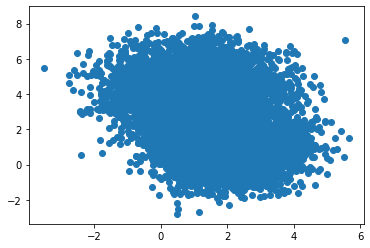

In [113]:
plt.scatter(x[:,0], x[:,1])

In [114]:
x_train, x_test, y_train, y_test =train_test_split(x,y, random_state=111)

In [115]:
from sklearn.svm import SVC
svc = SVC(gamma=0.05).fit(x_train, y_train)

In [119]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, \
                                                       svc.decision_function(x_test))

Text(0, 0.5, '재현율')

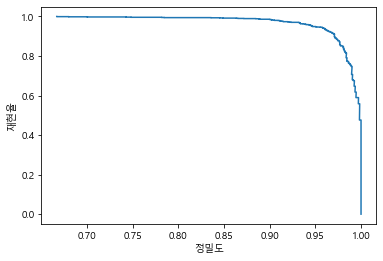

In [123]:
plt.plot(precision, recall, label='정밀도-재현율 곡선')
plt.xlabel('정밀도')
plt.ylabel('재현율')

# 정밀도가 높아지면 재현율을 낮아지고, 재현율이 높아지면 정밀도가 낮아진다..
# 좋은 모델은 모든 임계값 수준에서 정밀도와 재현율이 동시에 높은 모델이다..
# 정밀도-재현율 곡선의 아랫부분 면적이 클수록 좋은 모델
# 정밀도-재현율 곡선의 아래 면적 : average_precision_score()

In [124]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, svc.decision_function(x_test))

0.9885880392185753

In [125]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, random_state=111)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=111)

In [126]:
rfc.predict_proba(x_test)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       ...,
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [127]:
precision_rfc, recall_rfc, thresholds_rfc = \
        precision_recall_curve(y_test, rfc.predict_proba(x_test)[:,1])

Text(0, 0.5, '재현율')

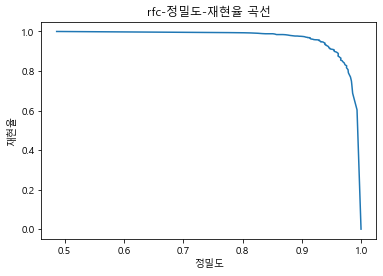

In [130]:
plt.plot(precision_rfc, recall_rfc, label='rfc-정밀도-재현율 곡선')
plt.title('rfc-정밀도-재현율 곡선')
plt.xlabel('정밀도')
plt.ylabel('재현율')

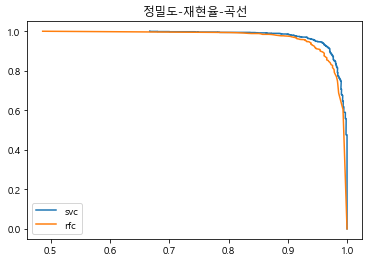

In [132]:
plt.plot(precision, recall, label='svc')
plt.plot(precision_rfc, recall_rfc, label='rfc')
plt.title('정밀도-재현율-곡선')
plt.legend()

In [133]:
svc_aps = average_precision_score(y_test, svc.decision_function(x_test))
rfc_aps = average_precision_score(y_test, rfc.predict_proba(x_test)[:,1])
print('svc_aps :', svc_aps, 'rfc_aps :', rfc_aps)

svc_aps : 0.9885880392185753 rfc_aps : 0.9791388544778379


In [ ]:
### ROC-AUC 곡선

# 모든 임계값에서 TPR(진짜 양성비율)과 FPR(거짓양성비율)을 그래프로 나타낸 곡선
# TPR - 재현율(recall), 실제 True인 데이터를 True라고 맞춘 비율
# FPR - 거짓양성비율, 실제 False인 데이터를 True라고 잘못 맞춘 비율
# TPR은 높을수록 좋고, FPR은 낮을수록 좋은 모델..
# roc-auc곡선의 면적 : roc_auc_score()
# 특히 imbalaced dataset 에서 유용한 평가지표로 사용.

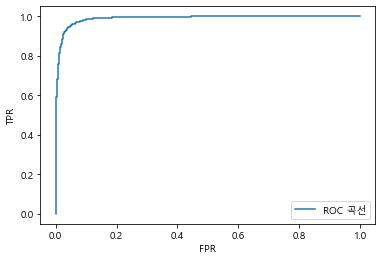

In [136]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(x_test))

plt.plot(fpr, tpr, label='ROC 곡선')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# tpr은 높고, fpr은 낮을수록 좋은 모델 - 좌상으로 그려질수록 좋은 모델..

In [137]:
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, rfc.predict_proba(x_test)[:,1])

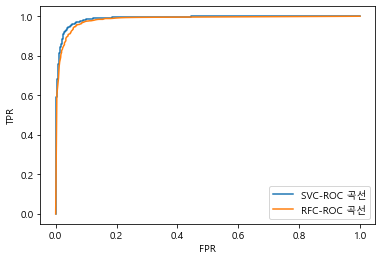

In [138]:
plt.plot(fpr, tpr, label='SVC-ROC 곡선')
plt.plot(fpr_rfc, tpr_rfc, label='RFC-ROC 곡선')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [141]:
from sklearn.metrics import roc_auc_score
rfc_auc_score = roc_auc_score(y_test, rfc.predict_proba(x_test)[:,1])
svc_auc_score = roc_auc_score(y_test, svc.decision_function(x_test))

print('랜덤 포래스트 AUC_SCORE :', rfc_auc_score)
print('SVC AUC_SCORE :', svc_auc_score)

랜덤 포래스트 AUC_SCORE : 0.9830793214051485
SVC AUC_SCORE : 0.9892771868339072
